# Are you mad enough to sell more clothes?

<img src="https://tablet-mag-images.b-cdn.net/production/458696ee8cc3614bf3014fc487f2ad4c33d1ca62-620x416.jpg?w=1200&q=70&auto=format&dpr=1"/>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The following lines are what the following cells enable:

```python
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clflog, Xtrain, ytrain, Xtest, ytest = 
do_classify(LogisticRegression(solver="liblinear"), params, 
dftouse,lcols, u'RESP',1,  mode="mask", reuse_split=mask)
```

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best
def do_classify(clf, parameters, indf, featurenames, targetname, target1val,mode="mask", reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    """
    Classification made simple (or is it more complex?)
    THIS WORKS FOR 2 Class Classification problems only
    parameters: parameter grid in the sklearn style
    indf: dataframe you feed in
    featurenames: list of columnames corresponding to features you want in your model
    targetname: the column you want to use as target
    target1val: the value of the "targetname" column
    mode: mask or split. mask a boolean mask to choose train/test or
        split a dictionary with keys Xtrain/Xtest/ytrain/ytest and values existing
        training and test sets in the canonical form
    reuse_split: the actual mask above or the actuall ditionary, depending upon which
        modu you chose
    score_func: this is from GridSearchCV
    n_folds: cross val folds
    n_jobs: mumber of processes to use in cross-validation
    
    We return classifier, and the train and test sets. We print accuracies
    and the confusion matrix
    """
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mode=="mask":
        print("using mask")
        mask=reuse_split
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    else:
        print("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    print(confusion_matrix(ytest, clf.predict(Xtest)))
    print("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

The data set is from a fairly high end clothing chain store in the North East.

You are a data analyst for this store. Your job is to write a report to the pointy-haired boss in which you show how you can increase the store's profit by being targeted about whom to send a catalog in the mail. Yes, you are in direct marketing. You are a quant amongst the "mad men". 

You need to explore and layout in simple terms, what the business needs to spend to increase its profit. In other words, you need a budget, and its your job to figure out how much as well.

We'll guide you through the process. There is much more you can explore, of-course, but this homework will walk you through an entire real world classification and analysis process with a finite amount of work and computer runtime.

You will

1. clean the data, and create some features, learning about how to standardize the data
2. write a classifier on this data, including cross validation, and learn to write a function to encapsulate this process
3. learn how to compare this classifier to baseline classifiers that you better beat using a profit metric rather than an accuracy metric
4. understand and use prediction thresholds

QUESTIONS 5 through 10 are removed from the assignement.

5. understand the use a ROC curve, especially in the situation where probability thresholds are not possible
6. learn to use a profit curve to pick a model, thus directly reflecting the metric of importance
7. learn a bit about feature selection, and why we need to pipeline feature selection and classification together, in an attempt to improve a classifier
8. balance a data set to improve the performance of a SVM classifier
9. implement a kernelized SVM to improve performance further.
10. make a final comparison of classifiers and make a presentation for your boss.

This homework is long because we are walking you through the entire process, start early! There are some parts of it that can be solved by understanding, copying, and slightly modifying code from the lab.  Feel free to do that. Pay attention to any difference in signature in the lab functions to the ones here.

The idea for this homework, and the attendant data set is taken from the book "Data Mining Methods and Models" by [Larose](http://www.dataminingconsultant.com/DMMM.htm). Henceforth we refer to this book as DMMM. There is an analysis of the data set there as well (ch7, the book is available online through our library), which you might be interested in. It is far more detailed than this homework, talking about log-normal data transformations, amongst other things.

(Image credit: www.tabletmag.com)

(This documentation of the fields is taken verbatim from DMMM).

The clothing-store data set contains information about 28,799 customers in the following 51 fields:

- Customer ID: unique, encrypted customer identification `HHKEY`
- Zip code `ZIP_CODE`
- Number of purchase visits `FRE`
- Total net sales `MON`
- Average amount spent per visit `AVRG`
- Amount spent at each of four different franchises (four variables) `AMSPEND`, `PSSPEND`, `CCSPEND`, `AXSPEND`
- Amount spent in the past month, the past three months, and the past six months `OMONSPEND`, `TMONSPEND`, `SMONSPEND`
- Amount spent the same period last year `PREVPD`
- Gross margin percentage `GMP`
- Number of marketing promotions on file `PROMOS`
- Number of days the customer has been on file `DAYS`
- Number of days between purchases `FREDAYS`
- Markdown percentage on customer purchases `MARKDOWN`
- Number of different product classes purchased `CLASSES`
- Number of coupons used by the customer `COUPONS`
- Total number of individual items purchased by the customer `STYLES`
- Number of stores the customer shopped at `STORES`
- Number of promotions mailed in the past year `MAILED`
- Number of promotions responded to in the past year `RESPONDED`
- Promotion response rate for the past year `RESPONSERATE`
- Product uniformity (low score = diverse spending patterns) `HI`
- Lifetime average time between visits `LTFREDAYS`
- Microvision lifestyle cluster type `CLUSTYPE`
- Percent of returns `PERCRET`
- Flag: credit card user `CC_CARD`
- Flag: valid phone number on file `VALPHON`
- Flag: Web shopper `WEB`
- 15 variables providing the percentages spent by the customer on specific classes of clothing, including sweaters, knit tops, knit dresses, blouses, jackets, career pants, casual pants, shirts, dresses, suits, outerwear, jewelry, fashion, legwear, and the collectibles line; (`P*`, `PJACKETS` for example) also a variable showing the brand of choice (encrypted)
- **Target variable**: response to promotion `RESP`...this is our **response** or **y**.


These data are based on a direct mail marketing campaign conducted last year. We want to use this information to develop classification models for this year’s marketing campaign.

## Features and a simple classifier

### Get, check, clean,  the data

In [3]:
df=pd.read_csv("./data/Clothing_Store.csv")
df.head(10) #display first 10 rows with all 51 columns of the dataset

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0
5,9955600079035,1106,26,2,120.00,0,60.00,11,0.00,0.56,...,Y,0,0,0,0.00,48.84,72.50,3,0.00,0
6,9955600088723,1118,145,1,782.08,1,782.08,11,0.12,0.00,...,Y,0,4,0,0.00,39.51,36.25,10,0.00,0
7,9955600089274,1106,356,1,79.00,0,79.00,11,0.00,0.00,...,Y,0,4,1,25.00,100.00,149.00,10,0.00,0
8,9955600093031,1104,264,1,318.50,0,318.50,11,0.24,0.00,...,N,0,3,0,0.00,50.42,264.00,23,0.00,0
9,9955600093053,1104,23,12,1663.46,1,138.62,11,0.25,0.04,...,Y,0,11,7,63.64,16.97,17.53,23,0.00,1


In [4]:
df.shape

(21740, 51)

We'll delete some columns we dont intend to use, and which I couldnt quite figure out what they were from the original data set and documentation.

In [5]:
del df['CLUSTYPE']
del df['HHKEY'], df['ZIP_CODE'], df['REC'], df['PC_CALC20'] 
del df['STORELOY']

In [6]:
df.columns

Index(['FRE', 'MON', 'CC_CARD', 'AVRG', 'PSWEATERS', 'PKNIT_TOPS',
       'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS',
       'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION',
       'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND',
       'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS',
       'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES',
       'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
       'LTFREDAY', 'PERCRET', 'RESP'],
      dtype='object')

Make a copy of the dataframe to make transformations to.

In [7]:
dftouse=df.copy()

In [8]:
df.shape

(21740, 45)

### Feature Engineering

Feature Engineering is one of the most important "human inputs" that go into machine learning. Machines can run algorithms, but if you feed in garbage, you will get out garbage. The features that are important, or the feature combinations that might be useful in a problem, are inputs that humans can use to help the machine along. Domain knowledge is particularly useful. 

We first list the columns that are percentages:

In [9]:
PERCENT_VARS=[ u'PSWEATERS', u'PKNIT_TOPS', u'PKNIT_DRES', u'PBLOUSES', u'PJACKETS', u'PCAR_PNTS', u'PCAS_PNTS', u'PSHIRTS', 
              u'PDRESSES', u'PSUITS', u'POUTERWEAR', u'PJEWELRY', u'PFASHION', u'PLEGWEAR', u'PCOLLSPND']
len(PERCENT_VARS)

15

Next, we look for columns where the existence or lack thereof of a zero may be important in a classifier. We used our intuition to make these choices, believing that there is additional information encoded in say, `PERCRET`: if you never returned anything you might not be a budget shopper and thus someone who might have the money to shop quite a bit...

In [10]:
ZERO_IMPORTANT_VARS = [u'PREVPD', u'AMSPEND', u'PSSPEND', u'CCSPEND', u'AXSPEND', u'RESPONDED', u'PERCRET']
len(ZERO_IMPORTANT_VARS)

7

We also list the columns with floating-point or integer variables that are amenable to standardization

In [11]:
STANDARDIZABLE = PERCENT_VARS + ZERO_IMPORTANT_VARS + [u'FRE', u'MON',  u'AVRG', u'GMP', u'PROMOS', u'DAYS', u'FREDAYS', u'MARKDOWN', u'CLASSES', u'COUPONS', u'STYLES',  u'MAILED',  u'RESPONSERATE', u'HI', u'LTFREDAY']
len(STANDARDIZABLE)
# STANDARDIZABLE is a set of all the percent_vars, zero_important_vars, along with 15 other variables. 

37

Now, an **indicator variable** is one which takes a few, usually 2 values (1/0, True/False) to code the existence or lack thereof of a property or feature. We look for existing indicators:

In [12]:
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10:
        print(v, l)

CC_CARD [0 1]
VALPHON ['N' 'Y']
WEB [0 1]
RESP [0 1]


#### Zero important indicators

We encode VALPHON, PERCENT_VARS, and ZERO_IMPORTANT_VARS as indicators. By doing this we are saying: the fact that these features are non-zero carries additional importance as compared to their values.

We maintain a global list INDICATORS in which the names of these columns are stored, prepending an `i_` to each of these variables to denote that they are indicators.

Note that all changes are now being made to the `dftouse` dataframe.

In [13]:
# rename some indicators and make them all 1-0
dftouse['i_VALPHON']=(df.VALPHON=='Y')*1
del dftouse['VALPHON']
dftouse.rename(columns={'WEB':'i_WEB', 'CC_CARD':'i_CC_CARD'}, inplace=True)
INDICATORS=['i_VALPHON','i_WEB','i_CC_CARD']

We then take the `ZERO_IMPORTANT_VARS`, the ones we thought where presence or absence was important, and create indicators from them

In [14]:
for p in ZERO_IMPORTANT_VARS:
    dftouse['i_'+p]=(df[p] > 0.0)*1
    INDICATORS.append('i_'+p)

And then we create indicators for each of the percent variables `PERCENT_VARS` (following Larose's ch7), in the hope that the presence or absence of buying a particular clothing style such as blouses makes a difference...

In [15]:
for p in PERCENT_VARS:
    dftouse['i_'+p]=(df[p] > 0.0)*1
    INDICATORS.append('i_'+p)

#### Combine some features 

We do this to communicate clearly information about recentness and savings

We add two more indicators corresponding to recent spending, and recent use of a savings mechanism.

In [16]:
#create recent usage (1 month and 3 month),  sale-shopper (markdown+coupon)
dftouse["i_RECENT"]=1*((df.OMONSPEND > 0) | (df.TMONSPEND > 0)) 
# if you bought anything between 1 or 3 months, you are a recent buyer
dftouse["i_SAVER"]=1*((df.MARKDOWN > 0) | (df.COUPONS > 0))
# if you have purchased product in markdown or have applied coupons, you are a saver
INDICATORS.append("i_RECENT")
INDICATORS.append("i_SAVER")

Lets see what we now have...

In [17]:
dftouse.head(25) #output the first 25 rows

,FRE,MON,i_CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,...,i_PSHIRTS,i_PDRESSES,i_PSUITS,i_POUTERWEAR,i_PJEWELRY,i_PFASHION,i_PLEGWEAR,i_PCOLLSPND,i_RECENT,i_SAVER
0,2,368.46,0,184.23,0.18,0.00,0.00,0.300000,0.00,0.25,...,1,0,0,0,0,1,1,1,0,1
1,4,258.00,1,64.50,0.26,0.16,0.00,0.000000,0.00,0.18,...,0,1,0,0,0,0,1,1,1,1
2,2,77.00,0,38.50,1.00,0.00,0.00,0.000000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
3,8,846.06,1,105.75,0.38,0.00,0.05,0.060000,0.20,0.17,...,1,0,0,0,1,1,1,0,1,1
4,1,87.44,0,87.44,0.20,0.20,0.00,0.000000,0.00,0.00,...,0,0,0,0,1,0,0,0,1,1
5,2,120.00,0,60.00,0.00,0.56,0.00,0.000000,0.00,0.00,...,0,0,0,0,1,1,0,0,1,1
6,1,782.08,1,782.08,0.12,0.00,0.00,0.000000,0.57,0.12,...,1,0,0,0,0,0,0,0,0,1
7,1,79.00,0,79.00,0.00,0.00,0.00,0.000000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,1
8,1,318.50,0,318.50,0.24,0.00,0.00,0.000000,0.31,0.18,...,0,1,0,0,0,0,0,1,0,1
9,12,1663.46,1,138.62,0.25,0.04,0.01,0.060000,0.11,0.24,...,1,0,0,0,1,1,1,0,1,1


In [18]:
dftouse.shape

(21740, 69)

Clearly we've currently expanded the number of features we have in an attempt to pit in information in the form of indicators which communicate additional distinguishing (in our opinion).

### Test and Training Sets, and Standardization

We standardize test and training sets separately. Specifically, we wish to standardize the non-indicator columns on both the test and training sets, by subtracting out the mean of the training set from the value, and dividing by the standard deviation of the training set. This helps us put all the continuous variables on the same scale.

(There is another reason this might be useful. One optimization which we dont do in this homework but which is useful is to take the log of all positive continuous variables. This makes data look more "normal" which can be useful in some algorithms, and then such standardization can basically be thought of in units of standard deviations of the normal distribution)

#### Q1. Why do we do this standardization on the two sets separately?

(Hint: what happens to the purity of the training data if we standardize using the entire dataset?)

*your answer here*

Standardization means that we have to compute the mean and the standard deviation of the data. We take the values of the column, subtract the mean of the values, and divide it by the standard deviation of the values. The mean and the SD is calculated through computing the whole data set. We need to test if the preformance of our model is any good. You should never look into the test dataset becuase by looking into the test data set, it is like cheating. Looking at the test, you are going to be overly optimistic about the acutal data set. If we do anything with the total mean or standard deviation of the entire data set, we are cheating and looking into the test data set. When we apply it separetly, we ensure that the scale of each dataset is consistent and does not bring in any bias or distortion. By applying it collectively, we can skew the analysis or modeling process. 

The purity of the training data, if we standardize using the entire dataset, may cause data leakage. By puting everything on one scale, we allow the machine learning toolto compute better logistical regressions or tree scales. By completing two seperate standardizations on two sets separetly, we also create a much easier environment to comprehend and analyze different data sets to make better business decisions. 

In general, variables may vary vastly depending on different scales and when standardizing them as a general, we can affect the performance of certain machine learning algorithms. By applying standardization seperately, we ensure the purity of each data within the set while also making sure that the model preforms better. In addition to that, standardizing variables separetely can help transform and preprocess variables in way that can ensures accurate and more precise analysis. By doing so, we accurately analyze each data set by modeling and preserving the original characteristics or meaning of the data when we scale them accordingly. This ofcourse avoids biases introduced when creating different scales.

We'll split the dataset and create a training and test mask.

In [19]:
from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(dftouse.shape[0]), train_size=0.7, random_state=1983)

In [20]:
mask=np.ones(dftouse.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
mask

array([ True,  True,  True, ..., False,  True,  True])

In [22]:
mask.shape, mask.sum() #mask.sum sums up to 70% of the data set

((21740,), 15217)

In [23]:
dftrain = df[mask]
dftest = df[~mask]

#### Q2. Explain how a mask is used above to split the data into training and test sets?

*your answer here*

We created indicies of the masks by computing the train_test_split which divides the data sets in training and testing. Then a mask is created with ones for the training set indicies and zeros for the test indicies which are then with a boolean set from True to 1 (as train) and from False to 0 (as test). Then we apply the mask to the original dataframe by selecting rows from the original dataset, creating seperate training and test sets. All this process is initialized in begining with the random_state of 1983 so that other users generate the same output using what you have done.

Overall, we created the mask with the same length as the number of rows of the dataFrame dftouse. Indices corresponding with the training set ('itrain') are set to integer 1 while indices corresponding with the test set ('itest') are set to 0 on the mask array. The mask array is then converted to a boolean array where the True indicates the data sets for train while the False corresponds with test data sets. Finally, the mask array is used to navigate through the dataframe to select rows corresponding with the True values, setting them as training set variables. Same applies when the dftest is corresponded with False values in the mask array, setting them to the test set. Therefore, the mask array acts as a selector for the data in the training and test sets. To ensure every user running this test ends with the same results, the random_state = 1983 was set (as a unique key of randomly assigned 70% train variables and 30% test sets). This approach ensures the data is split into mutually exclusive test and training sets while also maintaining the original order of the data in the global data frame.

#### We'll standardize the data

We'll use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDRARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler().fit(dftrain[STANDARDIZABLE].values)

In [26]:
scaler.mean_

array([2.14004977e-01, 2.65025278e-02, 4.24038499e-02, 9.29793098e-02,
       1.35212043e-01, 8.63539111e-02, 6.88694360e-02, 6.61740783e-02,
       6.86499190e-02, 3.45040401e-02, 1.82938688e-02, 9.85452704e-03,
       2.94535562e-02, 1.29327569e-02, 7.39101853e-02, 4.18878320e+01,
       1.46349188e+01, 1.47963305e+02, 2.90272421e+02, 2.36873076e+01,
       1.20365381e+00, 1.30640754e-01, 5.08911086e+00, 4.76318585e+02,
       1.13993882e+02, 5.23920086e-01, 1.15831636e+01, 4.37386476e+02,
       1.70586566e+02, 1.86756618e-01, 7.14155221e+00, 7.52119340e-01,
       1.72235000e+01, 4.67030295e+00, 1.74466925e+01, 3.81165414e+01,
       8.01916317e+01])

In [27]:
# subtract the mean and divide it by the standard deviation.
outtrain=scaler.transform(dftrain[STANDARDIZABLE].values)
outtest=scaler.transform(dftest[STANDARDIZABLE].values) # remove the fit_transform and replace to just transform
# always use the mean of the train set and the SD of the train set. 

In [28]:
np.sum(mask)

15217

In [29]:
np.sum(~mask)

6523

In [30]:
np.sum(mask) + np.sum(~mask)

21740

In [31]:
dftouse.loc[mask, STANDARDIZABLE] = outtrain
dftouse.loc[~mask, STANDARDIZABLE] = outtest

/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_42353/260851812.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.65235648  0.43160384 -0.65235648 ...  0.43160384 -0.65235648
  0.43160384]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dftouse.loc[mask, STANDARDIZABLE] = outtrain
/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_42353/260851812.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.47970091 -0.16912552 -0.47970091 ...  0.14144988 -0.32441322
 -0.01383782]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dftouse.loc[mask, STANDARDIZABLE] = outtrain
/var/folders/td/94qngg4x2_lcb32n6td6t7540000gn/T/ipykernel_42353/260851812.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and 

We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [32]:
lcols=list(dftouse.columns)
lcols.remove(u'RESP')
len(lcols)
# there are only 68 columns becuase the 69th column is the response column (the target).

68

### Writing code for a classifier

We will now take this data and write a classifier to predict the response, which is in the `RESP` column of `dftouse`. This response corresponds to asking the question: will a user targeted with our advertisement respond or not?

#### Train a Logistic Regression on this data.

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clflog, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(solver="liblinear"), params, dftouse,lcols, u'RESP',1,  mode="mask", reuse_split=mask)

using mask
BEST {'C': 0.1} 0.84990499727299
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.86
[[5352  103]
 [ 834  234]]
########################################################


In [35]:
#lower best would result overfit (bad)

We will create a dictionary of the used train and test set both on the features and target to reuse for later:

In [36]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

## Estimate costs and benefits from assumptions and data

### Our data is highly asymmetric

First notice that our data set is very highly asymmetric, with positive `RESP`onses only making up 16-17% of the samples.

In [37]:
print("whole data set", dftouse['RESP'].mean())#Highly asymmetric
print("training set", dftouse['RESP'][mask].mean(), "test set", dftouse['RESP'][~mask].mean())

whole data set 0.16609935602575898
training set 0.16711572583294998 test set 0.16372834585313506


This means that a classifier which predicts that EVERY customer is a negative has an accuracy rate of 83-84%. By this we mean that **a classifier that predicts that no customer will respond to our mailing** has an accuracy of 83-84%!

#### Compare the accuracy of the Logisic Regression to the no-customer-responds baseline

Based on your comparison, and using accuracy as a metric, does the classifier seem worthwhile pursuing?

Technically yes, its marginally better than the baseline of assuming that no-customer comes back...

But we havent asked the most important question. Is accuracy really the relevant metric?

### Costs and the Confusion Matrix

Our classifier above had, as one of its printed outputs, a confusion matrix. It looked like this:

In [38]:
ypred=clflog.predict(Xtest) #we are using logistic regression and choosing anything larger than 0.5 people are going to respond
confusion_matrix(ytest, ypred)

array([[5352,  103],
       [ 834,  234]])

The matrix above is of this form:

![hwimages](./images/confusionmatrix.png)


**Important note**: In sklearn, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`

In our example, +ives (those with a 1 `RESP`onse) are people who respond to the mailing by going into the store and buying goods. These are also called observed positives (OP). And -ives (those with a 0 `RESP`onse) are those who do not respond to the mailing. These are also called observed Negatives. On our test set, we can print the observed positives and observed negatives respectively:

In [39]:
print("OP=", ytest.sum(), ", ON=",ytest.shape[0] - ytest.sum())

OP= 1068 , ON= 5455


We can make a similar calculation on the predictions of our LR classifier made on the test set. This gives us the predicted negatives (PN): those customers who we predict will not respond to our mailing; and the predicted positives (PP), the customers who we predict will respond to our mailing by coming into the store to buy stuff.

In [40]:
print("PP=", ypred.sum(), ", PN=",ytest.shape[0] - ypred.sum())

PP= 337 , PN= 6186


In addition to these four quantities, the confusion matrix gives us more details on proper classifications and mis-classifications from our classifier:

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP). These are folks we correctly identified as responders,and thus sending them a mailing would result in a sale for us. True Positives are great. We do incur the cost of mailing them, but we like to because they will come into the store to buy.
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP). False Positives incur us the cost of mailing them as well, but are not very costly. These are people who wouldnt have responded, but we sent them a mailing because our classifier mispredicted them as buyers. Thus, for them, we only incur the cost of preparing the mailing and mailing it to them.
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN). These are folks we correctly identified as not-responding, and thus we dont waste any money on sending them a mailing. This is a great classification for us.
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN). False negatives are VERY costly: these are folks who would have responded to us had we mailed them, but we didnt target them, leading to huge lost sales per person. Notice that our SVM classifier has tons of False Negatives

It is not enough to simply identify these categories from the confusion matrix. Rather, we want to sit down with our business team and identify the costs associated with each of the 4 classification situations above. Keep in mind that these costs might even change from year to year or even more suddenly: this is why it is important to have marketing and sales people on your data science teams. (See Patil, D. J. Building data science teams. " O'Reilly Media, Inc.", 2011.
 for more details).
 
 Fortunately you have talked to your domain experts and done just that!

#### Costs for True Positives, False Negatives, False Positives, and True Negatives

Lets categorize the costs for each one of these alternatives.

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

True Negatives cost us nothing but gain us nothing either.

In [41]:
tnc=0.0 #tnr stands for "true negative cost"

From the average cost of a sale, and the 30% profit assumption, we calculate `tpc`, the cost of a true positive. Note: `tpc` must be negative, since we are talking about costs.

The `tpc` takes into account the cost of mailing to the respondent, and since our mailing works, we subtract out the profit. We use the average of the `AVRG` column, which is the average money spent by a customer on each visit.

In [42]:
dftrain.AVRG.mean(), dftrain.FRE.mean() 
#average a customer spends and number of visits

(113.99388249983572, 5.089110862850759)

In [43]:
prep_and_mail=3
coupon = 15
profit_margin=0.3
tpc=prep_and_mail + coupon - np.mean(dftrain.AVRG)*profit_margin
tpc

-16.198164749950713

The false negative is a lost sale for us! We didnt mail them, and they didnt spend the money. They would have if we mailed them. So we lost a certain profit per such false negative! Thus the false-negative cost, given by `fnc`, is:

In [44]:
fnc = 2*np.mean(dftrain.AVRG)*profit_margin
# multiplied by 2 becuase we assumed (by being preservative) that they would not come and spend money
fnc

68.39632949990143

This leaves us with False positives. This is a person who would not have responded but you wasted $3 on. So the false positive cost, (`fpc`) is:

In [45]:
fpc=prep_and_mail
fpc

3

#### Cost  and Utility Matrix

We then use these costs to write a **risk or cost matrix** in the same form as the confusion matrix above. 

![cost matrix](images/costmatrix.png)

In [46]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[  0.        ,   3.        ],
       [ 68.3963295 , -16.19816475]])

Notice that the cost of a false positive is 11 times less than the cost of a false negative. As is often the case in situations in which one class dominates the other, the costs of one kind of misclassification: false negatives are differently expensive than false positives. We saw above that FN are more costly in our case than FP. Similar situations arise in cancer prediction, for example, where a FP only means that you diagnosed a healthy person with cancer, but a FN means that you misdiagnosed a cancer patient as healthy: possibly killing them in the process!

The negative of the cost matrix is called the **utility matrix or profit matrix** `u`. Here we calculate this utility matrix, which we shall use in the next part of the homework.

In [47]:
u = - risk_matrix
u 
#initialize every variable as negative if positive to represent cost for the business

array([[ -0.        ,  -3.        ],
       [-68.3963295 ,  16.19816475]])

Ok! Now we can use this profit matrix to calculate the profit that the SVM classifier can land us. 

#### Average Profit Per Person

We can compute the average profit per person using the following formula, which calculates the "expected value" of the per-customer profit (the $P$ below stands for "predicted" and $O$ for observed):



\begin{eqnarray}
Profit &=& u(+P,+O) \times p(+P,+O) \\
       &+& u(+P,-O) \times p(+P,-O) \\
       &+& u(-P,+O) \times p(-P,+O) \\
       &+& u(-P,-O) \times p(-P,-O) 
\end{eqnarray}


which gives


$$ Profit =  \frac{( TP \times -TPC )+ ( FP \times -FPC ) + ( FN \times -FNC ) + ( TN \times -TNC )}{N}$$

where N is the total size of the test set, +P means predicted positive, -O is observed negative, and so on and so forth. The formula above just weighs the profit of a combination of observed and predicted with the out-of-sample probability of the combination occurring. The probabilities are "estimated" by the corresponding confusion matrix on the **test set**, which leads to the second formula. $-TPC$ is just the 'true positive' utility (similar for the others...).

The profit can thus be found by multiplying the utility matrix by the confusion matrix elementwise, and dividing by the sum of the elements in the confusion matrix, or the test set size.

We implement this process of finding the average profit per person in the `average_profit_pp` function below:

In [48]:
def average_profit_pp(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score

But before we make this calculation for our logistic classifier, we need to first check what profit or cost our baseline classifier which assumes that no customer will respond, incurs.

### Establishing Baseline Classifiers via profit

The simplest classifiers you can think of are the "send to everyone" and "dont send to everyone" classifiers. We explain these below. If we are going to write any more complex classifiers we should at-least outperform these.

#### Dont Send to Anyone Baseline Classifier 

This is the "majority" classifier we talked about earlier. We dont send mailings to anyone because we believe that **no-one will respond**. Thus this classifier predicts everyone to be a 0 or -ive, a non-respondent. Remember, this classifier has a 83-84% accuracy.

We write a confusion matrix `dste` for the "dont send to everyone" model (not the best acronym, I know!), and calculate the average profit per person as `dsteval`. 

In [49]:
testsize = dftouse[~mask].shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print(confusion_matrix(ytest, ypred_dste))
dsteval=average_profit_pp(ytest, ypred_dste, u)
dsteval

[[5455    0]
 [1068    0]]


-11.198417891444846

#### Send to Everyone Baseline Classifier

This is the other extreme. In this case we **predict everyone as responders** and send the mailing to everyone. In other words, we predict everyone on the test set to be a 1. Print out both the confusion matrix and `steval`, the average profit per person, for this case. Based on this result, which one of these two classifiers is the one to beat? Why?

In [50]:
#your code here
testsize = dftouse[~mask].shape[0]
ypred_ste = np.ones(testsize, dtype="int")
print(confusion_matrix(ytest, ypred_ste))
steval = average_profit_pp(ytest, ypred_ste, u)
steval

[[   0 5455]
 [   0 1068]]


0.1432837579253963

*your answer here*

If we assume that everyone will respond, we will make 0.14 dollars in profit per person. Send it to everyone would be the most optimal from the two choices above.

#### Q3: Compare the Logistic Regression classifier with these baselines

Using the  classifier we calculated, `clflog` and its predictions `ypred`, calculate the profit we can make

In [51]:
#your code here
average_profit_pp(ytest, ypred, u)

-8.211124981056159

If you did this correctly, at this point you might be a bit dejected....

#### Q4: Implement logistic regression with Lasso based feature selection

We run another classifier, a logistic regression with L1 regularization, using the `do_classify` function we defined above. L1 or Lasso regularization automatically does feature selection for us!

Return as the estimator `clflog_lasso`, and training and test sets `Xtrain`, `ytrain`, `Xtest`, and `ytest`. Let the regularization hyperparameter `C` range in powers of 10 from 0.001 to 100. Use the `reuse_split` dictionary we calculated earlier. Remember that we want to use "L1" or Lasso regularization: you can do this by passing `penalty="l1"` to the Logistic Regression: `LogisticRegression(penalty="l1")`.

Use `mode="not mask", reuse_split=reuse_split, solver='liblinear'` as additional arguments. The `reuse_split` argument makes sure that we are comparing the two classifiers on the same training and test sets.

In [52]:
#your code here
params = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clflog_lasso, Xtrain, ytrain, Xtest, ytest = do_classify(LogisticRegression(solver="liblinear", penalty="l1"),
                                                         params, dftouse,lcols, u'RESP',1, mode="not mask", reuse_split=reuse_split)

using reuse split
BEST {'C': 0.1} 0.8499705707461558
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.86
[[5352  103]
 [ 827  241]]
########################################################


Calculate the profit that this classifier gives us:

In [53]:
#your code here
ypred_lasso = clflog_lasso.predict(Xtest)
average_profit_pp(ytest, ypred_lasso, u)

-8.120344441465638

### What if we change the probability thresholds for these models?

In the case of such asymmetric costs, the `sklearn` API function `predict` is useless, as it assumes a threshold probability of having a +ive sample to be 0.5; that is, if a sample has a greater than 0.5 chance of being a 1, assume it is so. Clearly, when FN are more expensive than FP, you want to lower this threshold: you are ok with falsely classifying -ive examples as +ive. See Lab 5 for how this can be done.

You can think about this very starkly from the perspective of the cancer doctor. Do you really want to be setting a threshold of 0.5 probability to predict if a patient has cancer or not? The false negative problem: ie the chance you predict someone dosent have cancer who has cancer is much higher for such a threshold. You could kill someone by telling them not to get a biopsy. Why not play it safe and assume a much lower threshold: for eg, if the probability of 1(cancer) is greater than 0.05, we'll call it a 1.

Let us do this for our logistic regression example

#### Start with an arbitrary threshold t, and see how we fare at different thresholds for logistic regression

In [54]:
def t_repredict(est, t, Xtest):
    probs=est.predict_proba(Xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

We see average profits for multiple thresholds for the logistic regression classifier `clflog` and the lasso classifier clflog_lasso

**(a) Average profit per person for t=0.5 (the usual case)**

In [55]:
average_profit_pp(ytest,clflog.predict(Xtest), u), \
average_profit_pp(ytest,clflog_lasso.predict(Xtest), u)

(-8.211124981056159, -8.120344441465638)

**(b) Q5. Calculate Confusion Matrix and average profit per person for t=0.05 for both classifiers**

In [56]:
#GIVEN CODE FOR QUESTION 5
average_profit_pp(ytest, t_repredict(clflog, 0.05, Xtest), u), \
average_profit_pp(ytest, t_repredict(clflog_lasso, 0.05, Xtest), u),

(0.6884032925345899, 0.7271269617435199)

We are making more profit than if we are to send it to everyone becuase 0.13 is less than 0.68 (model 1) and 0.13 is less than 0.72 (model 2).

In [113]:
# your code here
ypred_log_005 = t_repredict(clflog, 0.05, Xtest)
ypred_lasso_005 = t_repredict(clflog_lasso, 0.05, Xtest)
confy_matrix_log_005 = confusion_matrix(ytest, ypred_log_005)
print(confy_matrix_log_005)

confy_matrix_loglasso_005 = confusion_matrix(ytest, ypred_lasso_005)
print(confy_matrix_loglasso_005)

[[2285 3170]
 [  39 1029]]
[[2341 3114]
 [  38 1030]]


**(c) Q6. Calculate average profit per person for t=0.95 for both classifiers**

In [58]:
# your code here (in-class code I came up with)
average_profit_pp(ytest, t_repredict(clflog, 0.95, Xtest), u), \
average_profit_pp(ytest, t_repredict(clflog_lasso, 0.95, Xtest), u),

(-11.042794109289668, -11.081700054828461)

In [59]:
#In class code we came up with
profit_log_095 = average_profit_pp(ytest, t_repredict(clflog, 0.95, Xtest), u)
profit_lasso_095 = average_profit_pp(ytest, t_repredict(clflog_lasso, 0.95, Xtest), u)
print(profit_log_095)
print(profit_lasso_095)

-11.042794109289668
-11.081700054828461


Voila, at a 0.05 threshold we have a nice positive profit! (if you did this right...)

We see that in this situation, where we have asymmetric costs (1:15), we do need to change the threshold at which we make our positive and negative predictions. We need to change the threshold so that we much dislike false nefatives (same in the cancer case). Thus we must accept many more false positives by setting such a low threshold.

For otherwise, we let too many people slip through our hands who would have otherwise shopped at our store. Once we change the threshold, we can make a profit. And indeed, at $t=0.05$, our profit is higher than in the "Send to Everyone" case, which makes doing the classifier worth it! But how do we pick this threshold?

## Profit Curves

The proof is always in the pudding. So far we have seen the ROC curve which implements one classifier per threshold to pick an appropriate model. But why not just plot the profit on a ROC like curve to see which classifier maximizes profit? 

Just like in a ROC curve, we go down the sorted (by score or probability) list of samples. We one-by-one add an additional sample to our positive samples, noting down the attendant classifier's TPR and FPR and threshold. We now also note down the percentage of our list of samples predicted as positive. Remember we start from the mostest positive, where the percentage labelled as positive would be minuscule, like 0.1 or so and the threshold like a 0.99 in probability or so. As we decrease the threshold, the percentage predicted to be positive clearly increases until everything is predicted positive at a threshold of 0. What we now do is, at each such additional sample/threshold (given to us by the `roc_curve` function from `sklearn`), we calculate the expected profit per person and plot it against the percentage predicted positive by that threshold to produce a profit curve. Thus, small percentages correspond to samples most likely to be positive: a percentage of 8% means the top 8% of our samples ranked by likelihood of being positive.

We provide code to plot a profit curve below, to which we must provide two critical functions:

- code to calculate expected profit given the TPR and FPR from a classifier (this is different than our `average_profit_pp` above as we now want this in terms of TPR and FPR.
- code to calculate the percentage of samples classified positive.given the TPR and FPR of a classifier.



In [60]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc

We implement a function `av_profit(tpr, fpr, util, priorp, priorn)` to calculate average profit per person given the utility matrix, the FPR rate, the TPR rate, and class balance.

$$
Profit = (TPR∗priorp∗−TPC)+((1−TPR)∗priorp∗−FNC)+(FPR∗priorn∗−FPC)+((1−FPR)∗priorn∗−TNC)
$$



In [61]:
"""
Function
--------
av_profit

Inputs
------
tpr: true positive rate
fpr: false positive rate
util: utility matrix for this problem
priorp: the probability of observed +ives (OP) on our test set
priorn: the probability of observed +ives (ON) on our test set

   
Returns
-------
The average profit per person at this (fpr, tpr) point in this ROC space.
     
Notes
-----
see make_profit below for an example of how this is used
"""
def av_profit(tpr, fpr, util, priorp, priorn):
    profit = priorp*(util[1][1]*tpr+util[1][0]*(1.-tpr))+priorn*(util[0][0]*(1.-fpr) +util[0][1]*fpr)
    return profit

In [70]:
from sklearn.metrics import roc_curve
def make_profit(name, clf, ytest, xtest, util, ax=None, threshold=False, labe=200, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_profit(tpr[i], fpr[i], util, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5, label='utlity curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    return ax

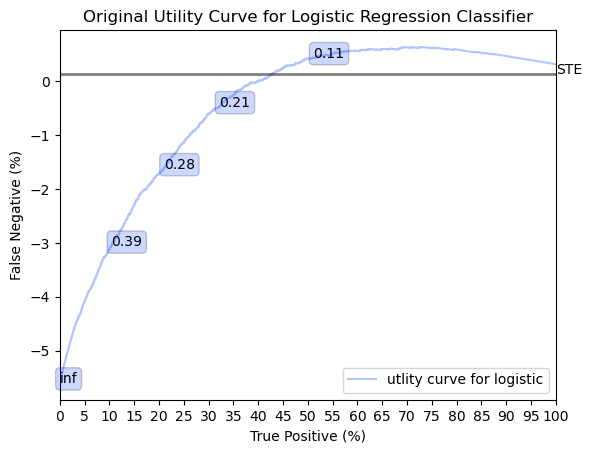

In [127]:
from matplotlib.ticker import MultipleLocator

with sns.color_palette("bright"):
    ax = make_profit("logistic", clflog, ytest, Xtest, u, threshold=True, labe=300)
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0, 100], [steval, steval], 'k-', alpha=0.5, lw=2)
    plt.xlim([0, 100])
    
    # Set x-axis ticks every 5 points
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # Adding labels and title to the plotted graph
    plt.xlabel('True Positive (%)')
    plt.ylabel('False Negative (%)')
    plt.title('Original Utility Curve for Logistic Regression Classifier')

plt.show()

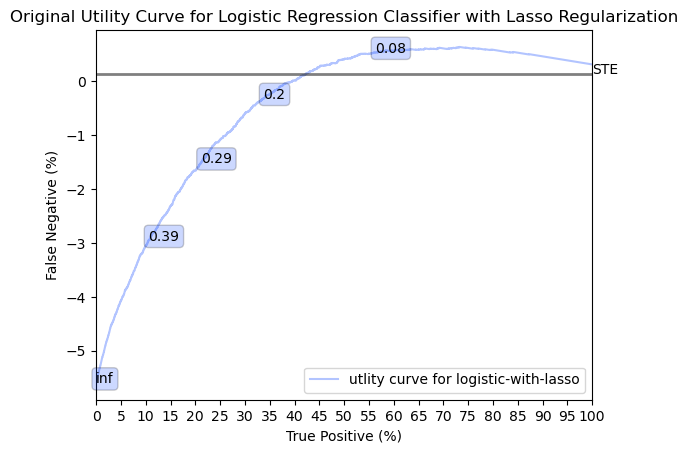

In [125]:
with sns.color_palette("bright"):
    ax=make_profit("logistic-with-lasso",clflog_lasso, ytest, Xtest, u, threshold=True, labe=300);
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0,100],[steval,steval],'k-', alpha=0.5, lw=2)
    plt.xlim([0,100])

    # Set x-axis ticks every 5 points
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # Adding labels and title to the plotted graph
    plt.xlabel('True Positive (%)')
    plt.ylabel('False Negative (%)')
    plt.title('Original Utility Curve for Logistic Regression Classifier with Lasso Regularization')

plt.show()


#### Q7: what range of thresholds do you make a profit for?

Class notes: The profit margin should be around 0 to 0.2. If it is then you are doing the right thing.

However, before I proceed with creating any appropriate assumptions, suggestions, and thresholds for the high end clothing company, cleaning up the graphs above is nessesary to come up with any appropriate proposals. Below are redefined graphs for both the ROC curve of the logistic and 

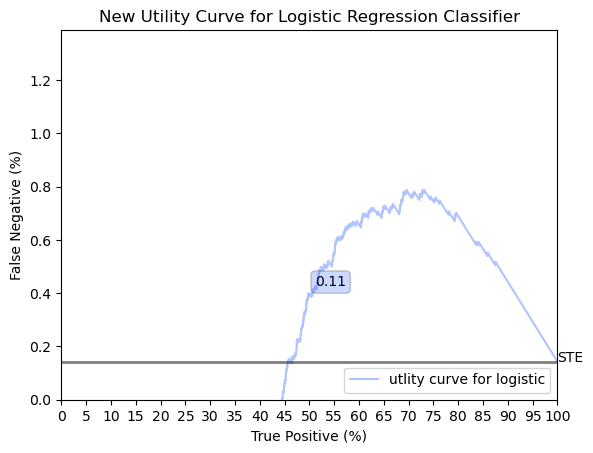

In [131]:
with sns.color_palette("bright"):
    ax = make_profit("logistic", clflog, ytest, Xtest, u, threshold=True, labe=300)
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0, 100], [steval, steval], 'k-', alpha=0.5, lw=2)
    plt.xlim([0, 100])
    
    # Set x-axis ticks every 5 points
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # Set y-axis limit to start at zero
    max_y = ax.get_ylim()[1]
    ax.set_ylim(0, max_y)

    # Adding labels and title to the plotted graph
    plt.xlabel('True Positive (%)')
    plt.ylabel('False Negative (%)')
    plt.title('New Utility Curve for Logistic Regression Classifier')

plt.show()

In mathematical terms, it makes sence to have negative percentage values for the False Negative axis while in logical or real life terms, it helps us barely with conducting any meaningful or appropriate analysis. Therefore, both the utility cure for logitic and utility curve for logistic-with-lasso were remodeled where anything above 0 for False Positives is shown, as we only care about anything zero or above. Below is an analysis of the Utility Curve for Logistic curve (refer GRAPH ABOVE under section 'NEW').

#### Utility Curve for Logistic (Graph 3)

By analyzing the graph above 'New Utility Curve for Logistic Regression Classifier', we are able to understand that the range for which the result holds a positive profit margin per customer is when the True positive is approximately 45% or greater while the False negative being 0% or higher. More importantly, from the graph above we are able to analyze that the marketing campaing will reach its potential maximum profit per customer when True positive is approximately 70% while the False negative is at 0.8%. 

In [202]:
#Recall of the cost and profit confusion matrix (KEEP EVERYTHING SAME)
prep_and_mail=3
coupon=15
profit_margin=0.3
# initial equation used to calculate profit and losses 
tnc=0.0 
tpc=prep_and_mail + coupon - np.mean(dftrain.AVRG)*profit_margin
fnc=2*np.mean(dftrain.AVRG)*profit_margin
fpc=prep_and_mail

risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

u = - risk_matrix
u 

array([[ -0.        ,  -3.        ],
       [-68.3963295 ,  16.19816475]])

In [203]:
#SET THE threshold so that it breakseven and is between 0-0.2 in profit margins
ypred_log_t = t_repredict(clflog, 0.13, Xtest)
confy_matrix_log_t = confusion_matrix(ytest, ypred_log_t)
print(confy_matrix_log_t)

[[3383 2072]
 [ 120  948]]


In [196]:
average_profit_pp(ytest, ypred_log_t, u)

0.1429251330622574

After a deliberate analysis of the confusion martix above along with the graphs provided, I have come to a conclusion that setting the threshold at 0.13 would be the best to get an average profit per person of 0.1429 with the following parameters of the marketing campaign (marketing cost: $3, coupon = $15, profit_margin of 0.3).

Therefore, to answer question 7:
The range of thresholds you make a profit for according to the graph would be from 45% to 100%.

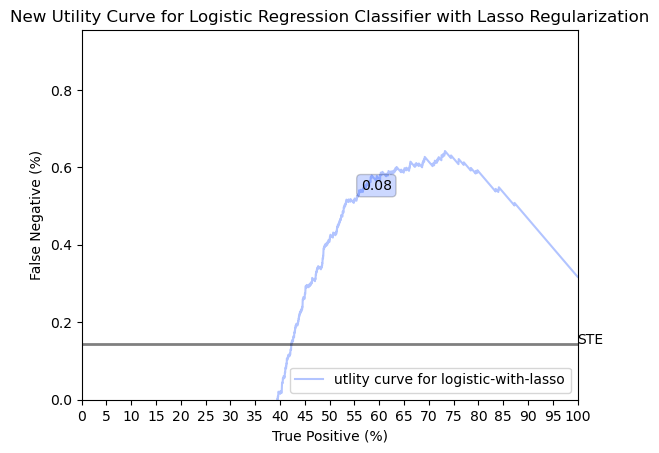

In [124]:
with sns.color_palette("bright"):
    ax = make_profit("logistic-with-lasso", clflog_lasso, ytest, Xtest, u, threshold=True, labe=300)
    ax.annotate("DSTE", (0.0, dsteval))
    ax.annotate("STE", (100.0, steval))
    plt.plot([0, 100], [steval, steval], 'k-', alpha=0.5, lw=2)
    plt.xlim([0, 100])
    
    # Set x-axis ticks every 5 points
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # Set y-axis limit to start at zero
    max_y = ax.get_ylim()[1]
    ax.set_ylim(0, max_y)

    # Adding labels and title to the plotted graph
    plt.xlabel('True Positive (%)')
    plt.ylabel('False Negative (%)')
    plt.title('New Utility Curve for Logistic Regression Classifier with Lasso Regularization')

plt.show()

#### Utility Curve for Logistic-With-Lasso (Graph 2)

By analyzing the graph above 'New Utility Curve for Logistic Regression Classifier with Lasso Regularization', we are able to understand that the range for which the result holds a positive profit margin per customer is when the True positive is approximately 40% or greater while the False negative being 0% or higher. More importantly, from the graph above we are able to analyze that the marketing campaing will reach its potential maximum profit per customer when True positive is approximately 75% while the False negative is at 0.6%. 

Q7: what range of thresholds do you make a profit for?

The probability threshold that the clothing company should hold on to in order to remain in profits after the marketing campaing is:
- FOR Logistic: TP is 45% or above and the threshold is less than 0.21 but greater than 0.11 (breakeven point)
- FOR Logistic-Lasso: TP is 40% or above and the threshold is less than 0.2 but greater than 0.08 (breakeven point)

#### Q8: EXTRA CREDIT: experimrnt with some different coupon and marketing costs. Can you increase the profit?

Hypothesis: By decreasing the marketing costs along with the coupon received to 10% of the average purchase made by the customer (which is approximately at $100 reference from above), we can increase the profit margins by having a relatively high threshold of contacting customers and them responding back). 

Marketing cost = $1.5 (decrease by 50% from initial $3)
Coupon cost = AVG(customer spends) * 25% --> $113.89 round down to closest 0 as tenth = $100 * 25% = $25
Coupon customer receives = $25

In [65]:
average_spend_per_visit = df['AVRG'].mean()
print(average_spend_per_visit)

113.88910533578658


In [233]:
# your code here
# initial values
prep_and_mail=3
coupon=15
profit_margin=0.3
# initial equation used to calculate profit and losses 
tnc=0.0 
tpc=prep_and_mail + coupon - np.mean(dftrain.AVRG)*profit_margin
fnc=2*np.mean(dftrain.AVRG)*profit_margin
fpc=prep_and_mail

#Model 1 (Changes in variables)
npm = 1.5
coup = 25
pm=0.45

ntnc=0.0
ntpc=npm + coup - np.mean(dftrain.AVRG)*pm
nfnc=2*np.mean(dftrain.AVRG)*pm
nfpc=npm

print(tnc, tpc, fnc, fpc)
print(ntnc, ntpc, nfnc, nfpc)

0.0 -16.198164749950713 68.39632949990143 3
0.0 -24.797247124926074 102.59449424985215 1.5


In [234]:
nrisk_matrix=np.array([[ntnc, nfpc],[nfnc, ntpc]])
nrisk_matrix

array([[  0.        ,   1.5       ],
       [102.59449425, -24.79724712]])

In [235]:
new = - nrisk_matrix
new 

array([[  -0.        ,   -1.5       ],
       [-102.59449425,   24.79724712]])

In [236]:
average_profit_pp(ytest, ypred_log_t, new)

1.2399894165947662

In [250]:
# your code here
# initial values
prep_and_mail=3
coupon=15
profit_margin=0.3
# initial equation used to calculate profit and losses 
tnc=0.0 
tpc=prep_and_mail + coupon - np.mean(dftrain.AVRG)*profit_margin
fnc=2*np.mean(dftrain.AVRG)*profit_margin
fpc=prep_and_mail

#Model 1 (Changes in variables)
npm = 1.5
coup = 5
pm=0.2

ntnc1=0.0
ntpc1=npm + coup - np.mean(dftrain.AVRG)*pm
nfnc1=2*np.mean(dftrain.AVRG)*pm
nfpc1=npm

print(tnc, tpc, fnc, fpc)
print(ntnc1, ntpc1, nfnc1, nfpc1)

0.0 -16.198164749950713 68.39632949990143 3
0.0 -16.298776499967147 45.597552999934294 1.5


In [251]:
nrisk_matrix1=np.array([[ntnc1, nfpc1],[nfnc1, ntpc1]])
nrisk_matrix1

array([[  0.       ,   1.5      ],
       [ 45.597553 , -16.2987765]])

In [252]:
new1 = - nrisk_matrix1
new1

array([[ -0.       ,  -1.5      ],
       [-45.597553 ,  16.2987765]])

In [253]:
average_profit_pp(ytest, ypred_log_t, new1)

1.0534315134105074

In [263]:
#KEEP SAME MARKETING COST AND MARGINS --> DECREASE COUPON
npm = 3
coup = 5
pm=0.3

ntnc2=0.0
ntpc2=npm + coup - np.mean(dftrain.AVRG)*pm
nfnc2=2*np.mean(dftrain.AVRG)*pm
nfpc2=npm

print(ntnc2, ntpc2, nfnc2, nfpc2)

nrisk_matrix2=np.array([[ntnc2, nfpc2],[nfnc2, ntpc2]])
nrisk_matrix2

0.0 -26.198164749950713 68.39632949990143 3


array([[  0.        ,   3.        ],
       [ 68.3963295 , -26.19816475]])

In [265]:
new2 = - nrisk_matrix2
new2

array([[ -0.        ,  -3.        ],
       [-68.3963295 ,  26.19816475]])

In [266]:
average_profit_pp(ytest, ypred_log_t, new2)

1.5962441580507594

In [273]:
#KEEP SAME COUPON COST AND MARGINS --> DECREASE NPM
npm = 1
coup = 15
pm=0.3

ntnc3=0.0
ntpc3=npm + coup - np.mean(dftrain.AVRG)*pm
nfnc3=2*np.mean(dftrain.AVRG)*pm
nfpc3=npm

print(ntnc3, ntpc3, nfnc3, nfpc3)

nrisk_matrix3=np.array([[ntnc3, nfpc3],[nfnc3, ntpc3]])

new3 = - nrisk_matrix3
new3

0.0 -18.198164749950713 68.39632949990143 1


array([[ -0.        ,  -1.        ],
       [-68.3963295 ,  18.19816475]])

In [274]:
average_profit_pp(ytest, ypred_log_t, new3)

1.0688794485612607

In [275]:
#LOWER BOTH COUPON AND MARKETING EXPENSE
#KEEP SAME COUPON COST AND MARGINS --> DECREASE NPM
npm = 1
coup = 5
pm=0.3

ntnc4=0.0
ntpc4=npm + coup - np.mean(dftrain.AVRG)*pm
nfnc4=2*np.mean(dftrain.AVRG)*pm
nfpc4=npm

print(ntnc4, ntpc4, nfnc4, nfpc4)

nrisk_matrix4=np.array([[ntnc4, nfpc4],[nfnc4, ntpc4]])

new4 = - nrisk_matrix4
new4

0.0 -28.198164749950713 68.39632949990143 1


array([[ -0.        ,  -1.        ],
       [-68.3963295 ,  28.19816475]])

In [277]:
average_profit_pp(ytest, ypred_log_t, new4)

2.522198473549763

As a result of the work above, it can be concluded that lowering both the marketing expenses and the coupon given to the customer upon receivable of the promotion suggests that we can increase the profits of the company by 2.52 per customer with the following scenario (refer above 'LOWER COUPON AND MARKETING EXPENSE').